When the following expression is positive, the ground station is in view:
$$ r(sin(\phi)cos(2\pi t)cos(i)cos(2\pi \omega t)+sin(\phi)sin(2\pi t)sin(2\pi \omega t)-cos(\phi)sin(i)cos(2\pi\omega t))-1$$

Where t is in units of days, $$r=1+h/R$$ and h is the altitude and R the radius of the Earth, and $$\omega=\frac{T2}{T1}$$ where $T2 = 86400$ (seconds in a day), and $$T1 =2\pi\sqrt{\frac{(h+R)^2}{\mu}}$$ 

Verified in Geogebra: ![ground station](ground_station.PNG)

In [1]:
from numpy import *
from matplotlib.pyplot import *

In [54]:
@vectorize
def gs(l, i, h):
    R = 6378e3
    r = 1+h*1e3/R
    N = 100000
    maxd = 10
    t = linspace(0,maxd,N)
    #l = 0.8*np.pi/2
    #i = 0.8
    mu = 3.98e14
    T2 = 86400
    T1 = 2*pi*sqrt((R*r)**3/mu)
    w = T2/T1
    f = r*(sin(l)*cos(2*pi*t)*cos(i)*cos(2*pi*w*t)+sin(l)*sin(2*pi*t)*sin(2*pi*w*t)\
           -cos(l)*sin(i)*cos(2*pi*w*t))-1
    g = np.sum(f>=0)/(float(N))
    return g


In [70]:
R = 6378.
h = 410

In [71]:
l = np.arccos(R/(R+h))

In [72]:
np.degrees(l)

20.015628590635878

In [73]:
lat = np.radians(50)
i = np.radians(62.5)

In [75]:
th1 = arccos((-sin(l)+cos(i)*sin(lat))/(sin(i)*cos(lat)))
#th2 = arccos((sin(l)+cos(i)*sin(lat))/(sin(i)*cos(lat)))
0, th1/np.pi 
#(th1-th2)/np.pi

(0, 0.49361086505000357)

In [76]:
gs(lat, i, h)

array(0.03482)

In [64]:
i+l, lat, i-l

(0.3452832096513343, 0.00017453292519943296, -0.34524830306629439)

In [3]:
ls = linspace(0, pi/2, 50)

In [4]:
lateff = map(lambda l: gs(l, 0, 400), ls)
lateff2 = map(lambda l: gs(l, 0, 300), ls)
lateff3 = map(lambda l: gs(l, 0.2, 300), ls)
lateff4 = map(lambda l: gs(l, 0.5, 300), ls)
lateff7 = map(lambda l: gs(l, 0.8, 300), ls)
lateff71 = map(lambda l: gs(l, 0.8, 400), ls)
lateff8 = map(lambda l: gs(l, 1.1, 300), ls)
lateff9 = map(lambda l: gs(l, 1.3, 300), ls)
lateff10 = map(lambda l: gs(l, 1.4, 300), ls)
lateff11 = map(lambda l: gs(l, 1.5, 300), ls)
lateff5 = map(lambda l: gs(l, np.pi/2, 300), ls)
lateff6 = map(lambda l: gs(l, np.pi/2, 400), ls)

In [5]:
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120

In [11]:
x,y = np.meshgrid(np.linspace(0.01, np.pi/2, 50), np.linspace(0.01, np.pi/2, 50))

In [5]:
hi = 300  #km

In [12]:
z = np.array([gs(ls, elt, hi) for elt in ls])

In [13]:
import numpy.ma as ma

In [19]:
zm = ma.array(z, mask=z<=0)

In [20]:
zl = np.log(zm)
xl = np.log(x)
yl = np.log(y)

C:\Users\johan\Miniconda2\envs\aerohybrid\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


In [9]:
from mpl_toolkits.mplot3d import Axes3D

In [10]:
%matplotlib notebook

In [27]:
v = (zl - zl.min().min())
v = v / v.max().max()

In [32]:
figure()
contourf(xl, yl, zl)
xlabel('\pi/2 minus latitude of ground station')
ylabel('inclination of orbit')
title('Ground station average comm factor at h=%skm'%hi)
colorbar();

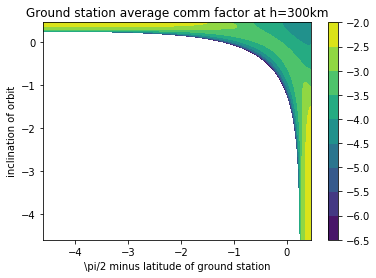

In [33]:
show()

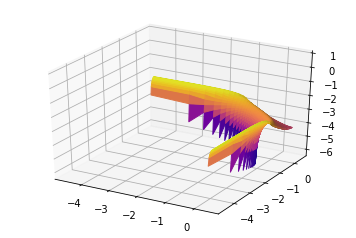

In [29]:
from mpl_toolkits.mplot3d import Axes3D
fig = figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xl,yl,zl, facecolors=cm.plasma(v));
show()

<IPython.core.display.Javascript object>


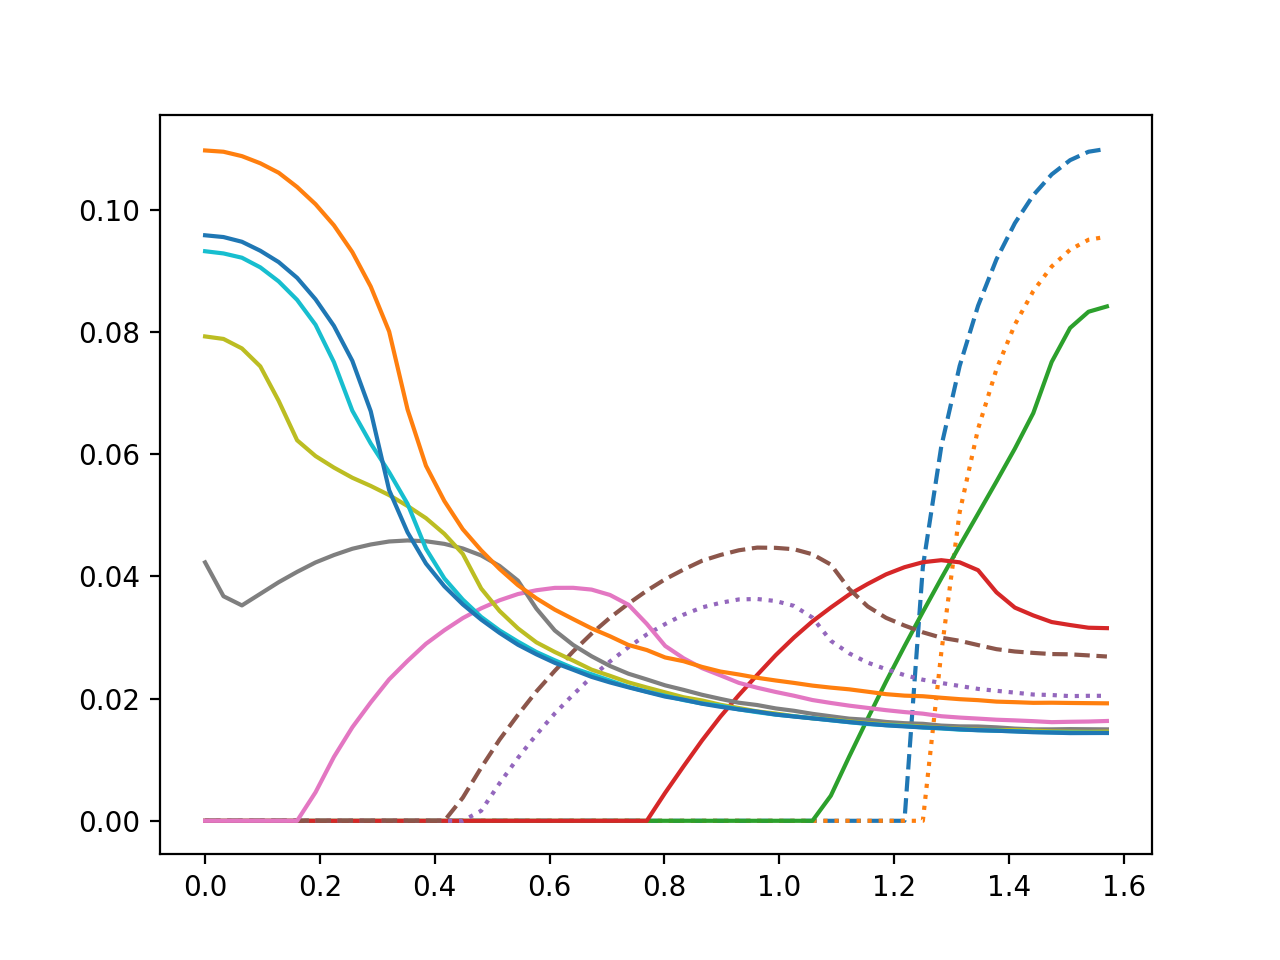

In [18]:
figure()
plot(ls, lateff, '--')
plot(ls, lateff2, ':')
plot(ls, lateff3)
plot(ls, lateff4)
plot(ls, lateff7, ':')
plot(ls, lateff71, '--')
plot(ls, lateff8)
plot(ls, lateff9)
plot(ls, lateff10)
plot(ls, lateff11)
plot(ls, lateff5)
plot(ls, lateff6);